In [ ]:
!nvidia-smi

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")

print("Found GPU at: {}".format(device_name))

In [1]:
from google.colab import drive

drive.mount("./gdrive", force_remount=True)

%cd "./gdrive/My Drive/handwritten-text-recognition_3/src"

!ls -l

Mounted at ./gdrive
/content/gdrive/My Drive/handwritten-text-recognition_3/src
total 1635
drwx------ 2 root root    4096 Apr 26 14:41 data
drwx------ 2 root root    4096 Apr 26 14:41 language
-rw------- 1 root root   11223 Apr 15  2022 main.py
drwx------ 2 root root    4096 Apr 26 14:41 network
-rw------- 1 root root   43371 Apr  5 04:34 tutorial_1.ipynb
-rw------- 1 root root 1606229 Jan 24 00:18 tutorial.ipynb


**Charger le modèle**

In [5]:
############################# 3.1. ENVIRONNEMENT ###############################
import os
import datetime
import string

# define parameters
source = "polier_7" # commenter si on fait une boucle
arch = "flor"
epochs = 250
batch_size = 16

# define paths
# chemin des données transformées depuis Transkribus
source_path = '../data/polier_7.hdf5'

# chemin de sauvegarde des données (e.g. prediction)
output_path = '../output/polier_7/flor'
os.makedirs(output_path, exist_ok=True)
# chemin vers le modèle
target_path = '../output/polier_7/flor/polier_7_pretrain.hdf5'


# define input size, number max of chars per line and list of valid chars
input_size = (1024, 128, 1)
max_text_length = 128
charset_base = string.printable[:95]


print("source:", source_path)
print("output", output_path)
print("target", target_path)
print("charset:", charset_base)

############################# 3.2. DATAGENERATOR CLASS #########################

from data.generator import DataGenerator

dtgen = DataGenerator(source=source_path,
                      batch_size=batch_size,
                      charset=charset_base,
                      max_text_length=max_text_length)

print(f"Train images: {dtgen.size['train']}")
print(f"Validation images: {dtgen.size['valid']}")
print(f"Test images: {dtgen.size['test']}")

############################# 3.3. HTRMODEL CLASS #######################################

from network.model import HTRModel

# create and compile HTRModel
model = HTRModel(architecture=arch,
                 input_size=input_size,
                 vocab_size=dtgen.tokenizer.vocab_size,
                 beam_width=10,
                 stop_tolerance=20,
                 reduce_tolerance=15)

model.compile(learning_rate=0.001)
model.summary(output_path, "summary.txt")

# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)

source: ../data/polier_7.hdf5
output ../output/polier_7/flor
target ../output/polier_7/flor/polier_7_pretrain.hdf5
charset: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
Train images: 1975
Validation images: 281
Test images: 563
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1024, 128, 1)]    0         
                                                                 
 conv2d_6 (Conv2D)           (None, 512, 64, 16)       160       
                                                                 
 p_re_lu_6 (PReLU)           (None, 512, 64, 16)       16        
                                                                 
 batch_normalization_6 (Batc  (None, 512, 64, 16)      112       
 hNormalization)                                                 
                                            

**Boucle**

In [ ]:
# ERREURS 1 : RESOLUS  

# 93-98 + 101 + 106 + 108 + 111 + 113 + 116 + 117 + 118 + 121 
#+ 122 + 123 + 126 + 127 + 128 + 130 + 131 + 132 + 133 
# + 139 + 144 + 148 + 149 + 150 + 157 + 158 + 159 

# Liste restant à faire de 90 à 200 minus erreurs 





for source in ["CH_ACV_P_RENE_MONOD_112", 
               "CH_ACV_P_RENE_MONOD_114", 
               "CH_ACV_P_RENE_MONOD_115", 
               "CH_ACV_P_RENE_MONOD_119",
               "CH_ACV_P_RENE_MONOD_120", 
               "CH_ACV_P_RENE_MONOD_124", 
               "CH_ACV_P_RENE_MONOD_125",  
               "CH_ACV_P_RENE_MONOD_129"]:

for source in ["CH_ACV_P_RENE_MONOD_134", 
               "CH_ACV_P_RENE_MONOD_135", 
               "CH_ACV_P_RENE_MONOD_136", 
               "CH_ACV_P_RENE_MONOD_137", 
               "CH_ACV_P_RENE_MONOD_138",]:

for source in ["CH_ACV_P_RENE_MONOD_140", 
               "CH_ACV_P_RENE_MONOD_141", 
               "CH_ACV_P_RENE_MONOD_142", 
               "CH_ACV_P_RENE_MONOD_143",  
               "CH_ACV_P_RENE_MONOD_145", 
               "CH_ACV_P_RENE_MONOD_146", 
               "CH_ACV_P_RENE_MONOD_147"]:

for source in ["CH_ACV_P_RENE_MONOD_151", 
               "CH_ACV_P_RENE_MONOD_152", 
               "CH_ACV_P_RENE_MONOD_153", 
               "CH_ACV_P_RENE_MONOD_154", 
               "CH_ACV_P_RENE_MONOD_155", 
               "CH_ACV_P_RENE_MONOD_156"]:

for source in ["CH_ACV_P_RENE_MONOD_164", 
               "CH_ACV_P_RENE_MONOD_165", 
               "CH_ACV_P_RENE_MONOD_167", 
               "CH_ACV_P_RENE_MONOD_168", 
               "CH_ACV_P_RENE_MONOD_169"]:

for source in ["CH_ACV_P_RENE_MONOD_171", 
               "CH_ACV_P_RENE_MONOD_172", 
               "CH_ACV_P_RENE_MONOD_173", 
               "CH_ACV_P_RENE_MONOD_174", 
               "CH_ACV_P_RENE_MONOD_175", 
               "CH_ACV_P_RENE_MONOD_176", 
               "CH_ACV_P_RENE_MONOD_178", 
               "CH_ACV_P_RENE_MONOD_179"]:

for source in ["CH_ACV_P_RENE_MONOD_181", 
               "CH_ACV_P_RENE_MONOD_182", 
               "CH_ACV_P_RENE_MONOD_183", 
               "CH_ACV_P_RENE_MONOD_184", 
               "CH_ACV_P_RENE_MONOD_185"]:                 

In [ ]:
# ERREURS 2 

# 144
# + 160 + 161 + 162 + 163 + 166 + 
# 170 + 171 + 174 + 176 + 177 + 180 + 186 

In [ ]:
# ERREUR 3 : 
# + 187 + 210 

In [ ]:
# ERREUR 4 : REEXPORTER 

# 164 : reexporter manque xml 

#070 : erreur reassamble 

# 001 002 092 : perdus bentham 

106 


In [ ]:
for source in ["CH_ACV_P_RENE_MONOD_144",
               "CH_ACV_P_RENE_MONOD_161", 
               "CH_ACV_P_RENE_MONOD_162",
               "CH_ACV_P_RENE_MONOD_163",
               "CH_ACV_P_RENE_MONOD_166", 
               "CH_ACV_P_RENE_MONOD_170", 
               "CH_ACV_P_RENE_MONOD_171",
               "CH_ACV_P_RENE_MONOD_174", 
               "CH_ACV_P_RENE_MONOD_176", 
               "CH_ACV_P_RENE_MONOD_180", 
               "CH_ACV_P_RENE_MONOD_186", 
               "CH_ACV_P_RENE_MONOD_187", 
               "CH_ACV_P_RENE_MONOD_210",
               "CH_ACV_P_RENE_MONOD_164",
               "CH_ACV_P_RENE_MONOD_070",
               "CH_ACV_P_RENE_MONOD_001",
               "CH_ACV_P_RENE_MONOD_002",
               "CH_ACV_P_RENE_MONOD_092",
               "CH_ACV_P_RENE_MONOD_106",
               "CH_ACV_P_RENE_MONOD_119"]: 

Train images: 291
Validation images: 291
Test images: 7615
Model Predict
476/476 [==============================] - 12s 21ms/step
CTC Decode
  1/476 [..............................] - ETA: 11:35

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


476/476 [==============================] - 725s 2s/step



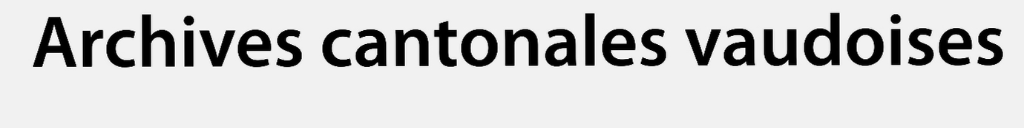

sans transcription
X 8dr 7&93  




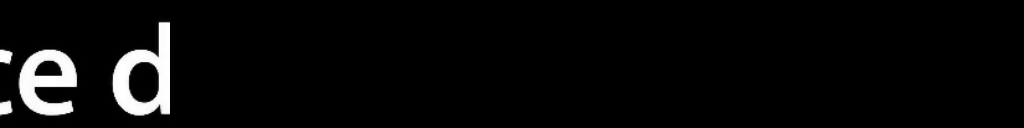

sans transcription
 




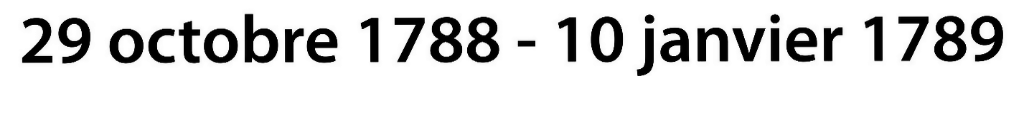

sans transcription
7& & 38 78 &7Xu3 78 




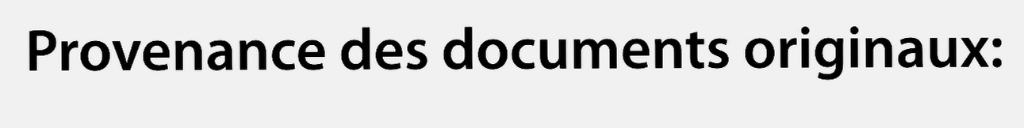

sans transcription
993 9 775 &19 777: 




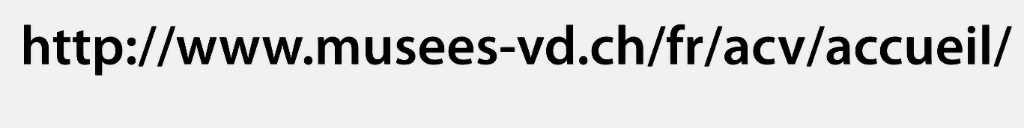

sans transcription
X Hu 77 2 1 & 1& 1d &3 271 




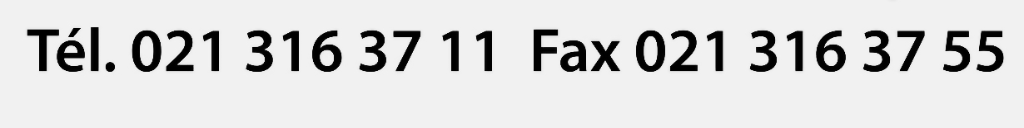

sans transcription
& & &7&3+ + 831&37 




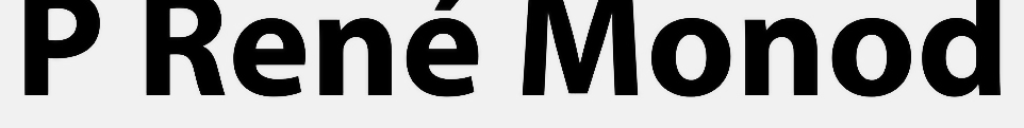

sans transcription
PL 




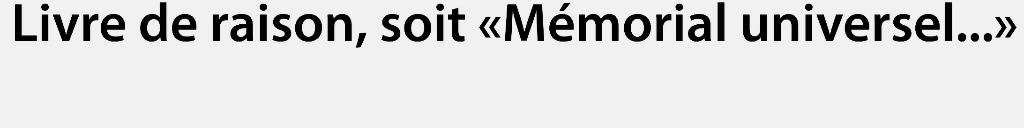

sans transcription
 V 9& &8 EeX d &VV 93 de7 




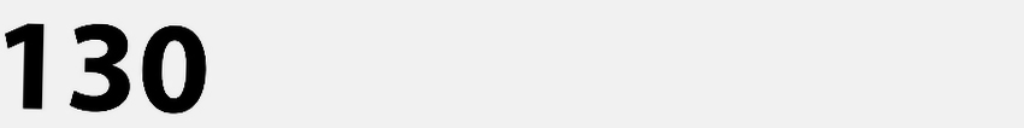

sans transcription
56 




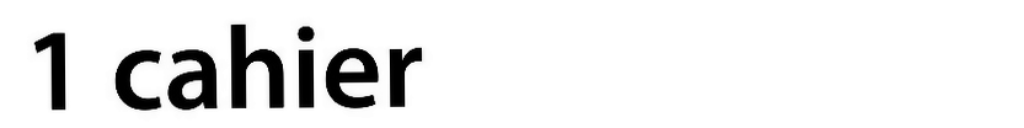

sans transcription
{ 7 



In [6]:
import os
import datetime
import string

# max 40-50 hdf5

#probleme : 103 104 130


for source in ["CH_ACV_P_RENE_MONOD_130"]: 
  

############################# 3.1. ENVIRONNEMENT ###############################


  arch = "flor"
  epochs = 250
  batch_size = 16

  # define paths
  # chemin des données transformées depuis Transkribus
  source_path = os.path.join("..", "data", f"{source}.hdf5")

  # chemin de sauvegarde des données (e.g. prediction)
  output_path = os.path.join("..", "output", source, arch)
  os.makedirs(output_path, exist_ok=True)

  # chemin vers le modèle
  target_path = '../output/polier_7/flor/polier_7_pretrain.hdf5'

  # define input size, number max of chars per line and list of valid chars
  input_size = (1024, 128, 1)
  max_text_length = 128
  charset_base = string.printable[:95]


############################# 3.2. DATAGENERATOR CLASS #########################


  from data.generator import DataGenerator

  dtgen = DataGenerator(source=source_path,
                        batch_size=batch_size,
                        charset=charset_base,
                        max_text_length=max_text_length)

  print(f"Train images: {dtgen.size['train']}")
  print(f"Validation images: {dtgen.size['valid']}")
  print(f"Test images: {dtgen.size['test']}")


############################# 5. PREDICT #######################################


  from data import preproc as pp
  from google.colab.patches import cv2_imshow

  start_time = datetime.datetime.now()

  # predict() function will return the predicts with the probabilities
  predicts, _ = model.predict(x=dtgen.next_test_batch(),
                              steps=dtgen.steps['test'],
                              ctc_decode=True,
                              verbose=1)

  # decode to string
  predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]
  ground_truth = [x.decode() for x in dtgen.dataset['test']['gt']]

  total_time = datetime.datetime.now() - start_time

  # mount predict corpus file
  with open(os.path.join(output_path, f"predict_{source}.txt"), "w") as lg:
      for pd, gt in zip(predicts, ground_truth):
          lg.write(f"TE_L {gt}\nTE_P {pd}\n")
    
  for i, item in enumerate(dtgen.dataset['test']['dt'][:10]):
      print("=" * 1024, "\n")
      cv2_imshow(pp.adjust_to_see(item))
      print(ground_truth[i])
      print(predicts[i], "\n")